# **1M MovieLens Data Set**





**Loading the data frames containing the results of the fitted models**

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd
  
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


link1 = 'https://drive.google.com/file/d/1VQ0BTiUDG5EVB6nsCIsn-xBczKOF61K1/view?usp=sharing'

link2='https://drive.google.com/file/d/1MVaRncH4wgF56I__ktFHZ4yUWQ_yX5K9/view?usp=sharing'

link3='https://drive.google.com/file/d/1mC2rEUbN_k6qvURQIP4HsPS61RQGz4of/view?usp=sharing'
  
# to get the id part of the file
id1 = link1.split("/")[-2]
id2 = link2.split("/")[-2]
id3 = link3.split("/")[-2]

downloaded1 = drive.CreateFile({'id':id1}) 
downloaded1.GetContentFile('df_tuning_results_ml_MF.csv')  
downloaded2 = drive.CreateFile({'id':id2}) 
downloaded2.GetContentFile('df_tuning_results_ml_AE.csv')  
downloaded3 = drive.CreateFile({'id':id3}) 
downloaded3.GetContentFile('df_tuning_results_ml_VAE.csv')  

MF_tuning_results_ml = pd.read_csv( 'df_tuning_results_ml_MF.csv')

AE_tuning_results_ml = pd.read_csv('df_tuning_results_ml_AE.csv' )

VAE_tuning_results_ml = pd.read_csv( 'df_tuning_results_ml_VAE.csv')

# MF_tuning_results_ml.head(4)
# AE_tuning_results_ml.head(4)
# VAE_tuning_results_ml.head(4)

# **VAE Models Fitting**

In [ ]:
#Loaded data frame data types verification
# VAE_tuning_results_ml.dtypes
#Adding model train runtime in sec to data frame
VAE_tuning_results_ml['runtime_sec'] = (pd.to_datetime(VAE_tuning_results_ml['datetime_complete'] )- pd.to_datetime(VAE_tuning_results_ml['datetime_start'])).dt.total_seconds() 
mask=(VAE_tuning_results_ml['state']=='COMPLETE')
VAE_tuning_results_ml = (VAE_tuning_results_ml[mask])
model=VAE_tuning_results_ml[['params_activation_func', 'params_batch_size', 'params_dropout','params_learning_rate','params_optimizer','params_p_dims']].astype(str)
model['model']=model[['params_activation_func', 'params_batch_size', 'params_dropout','params_learning_rate','params_optimizer','params_p_dims']].agg('-'.join, axis=1)
VAE_tuning_results_ml['model']=model['model']
VAE_tuning_results_ml



,number,value,datetime_start,datetime_complete,duration,params_activation_func,params_batch_size,params_dropout,params_learning_rate,params_optimizer,params_p_dims,state,runtime_sec,model
0,0,7760.529412,2022-02-08 05:07:04.874014,2022-02-08 05:12:06.939495,0 days 00:05:02.065481,tanh,128,0.375753,0.0001,Adam,"[200, 600]",COMPLETE,302.065481,"tanh-128-0.3757530455490458-0.0001-Adam-[200, ..."
1,1,7860.235294,2022-02-08 05:12:06.942183,2022-02-08 05:16:46.756568,0 days 00:04:39.814385,relu,512,0.245996,0.0001,Adam,"[200, 600]",COMPLETE,279.814385,"relu-512-0.2459958302152186-0.0001-Adam-[200, ..."
2,2,8071.090664,2022-02-08 05:16:46.760248,2022-02-08 05:21:36.546988,0 days 00:04:49.786740,relu,128,0.347139,0.0001,SGD,"[200, 600]",COMPLETE,289.786740,"relu-128-0.3471386834861611-0.0001-SGD-[200, 600]"
3,3,7495.019428,2022-02-08 05:21:36.554055,2022-02-08 05:25:42.381073,0 days 00:04:05.827018,relu,512,0.439687,0.0100,Adam,"[250, 500]",COMPLETE,245.827018,"relu-512-0.4396872717520907-0.01-Adam-[250, 500]"
4,4,7522.819752,2022-02-08 05:25:42.383742,2022-02-08 05:29:52.791684,0 days 00:04:10.407942,tanh,512,0.411485,0.0010,Adam,"[250, 500]",COMPLETE,250.407942,"tanh-512-0.4114850605593342-0.001-Adam-[250, 500]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,93,8272.279007,2022-02-08 12:03:02.415896,2022-02-08 12:07:56.516875,0 days 00:04:54.100979,tanh,512,0.240706,0.0001,SGD,"[250, 500]",COMPLETE,294.100979,"tanh-512-0.2407062821692803-0.0001-SGD-[250, 500]"
95,95,7785.554236,2022-02-08 12:12:24.750065,2022-02-08 12:17:01.521314,0 days 00:04:36.771249,relu,128,0.262331,0.0001,Adam,"[200, 600]",COMPLETE,276.771249,"relu-128-0.2623314715992475-0.0001-Adam-[200, ..."
96,96,8267.270372,2022-02-08 12:17:01.528247,2022-02-08 12:22:28.279772,0 days 00:05:26.751525,tanh,128,0.484533,0.0001,SGD,"[200, 600]",COMPLETE,326.751525,"tanh-128-0.4845326071304072-0.0001-SGD-[200, 600]"
97,97,7405.094441,2022-02-08 12:22:28.282258,2022-02-08 12:26:31.181311,0 days 00:04:02.899053,selu,256,0.359021,0.0010,RMSprop,"[250, 500]",COMPLETE,242.899053,selu-256-0.3590213259755641-0.001-RMSprop-[250...


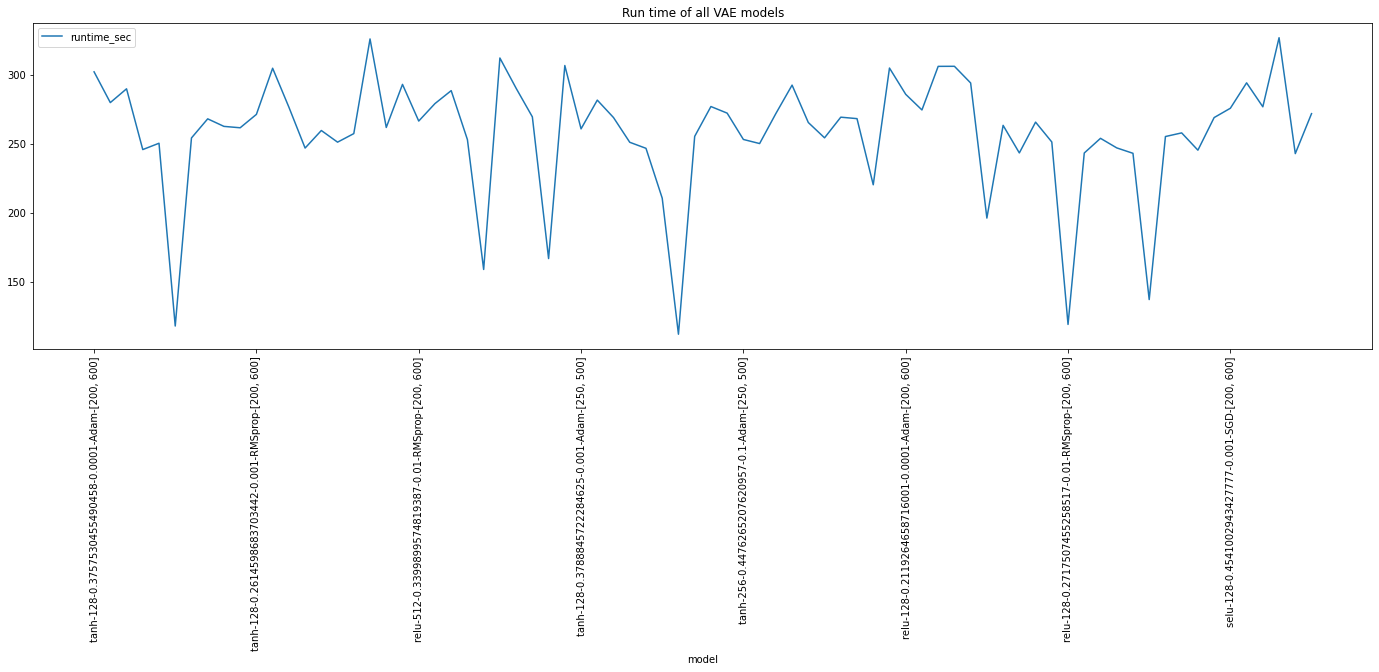

In [ ]:
VAE_tuning_results_ml.plot(x='model', y='runtime_sec',title ='Run time of all VAE models',figsize=(24,6),rot=90)


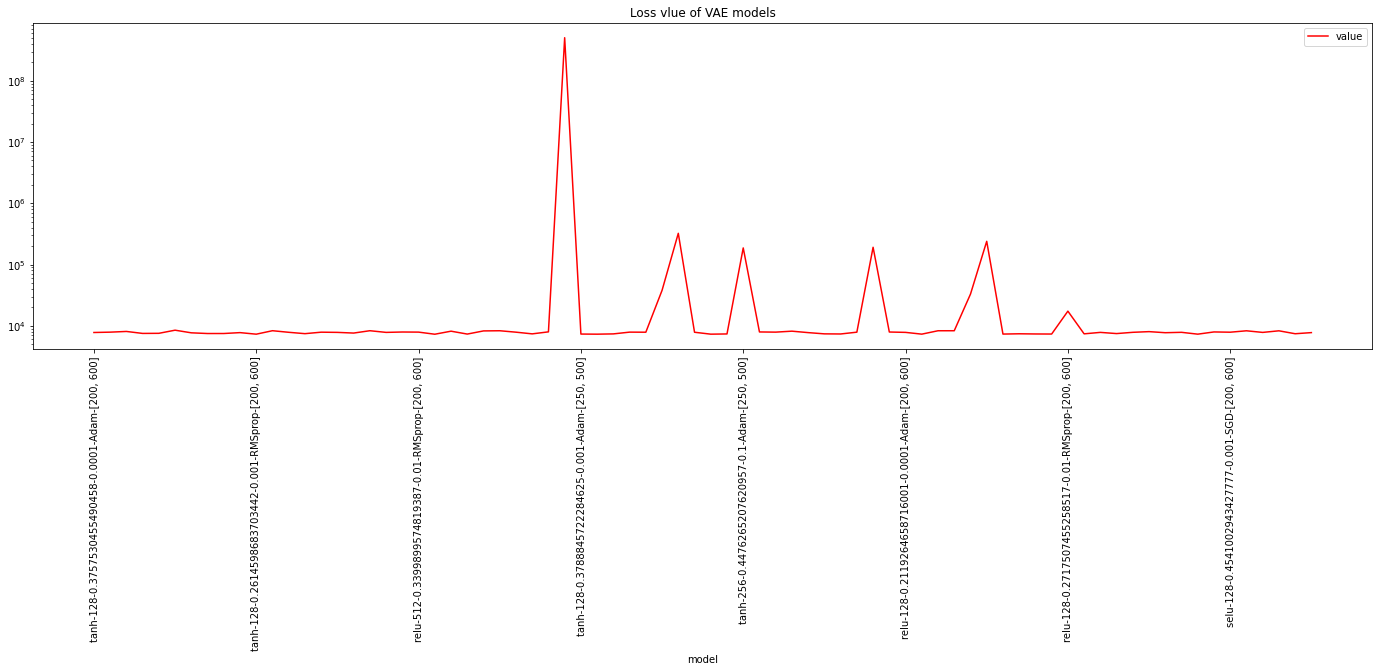

In [ ]:
VAE_tuning_results_ml.plot(x='model', y='value',title ='Loss vlue of  all VAE models',figsize=(24,6),rot=90,color='r',logy=True)


In [ ]:
VAE_tuning_results_ml=VAE_tuning_results_ml.sort_values(by=['value'],ascending=True)
VAE_tuning_results_ml_top=VAE_tuning_results_ml.head(20)

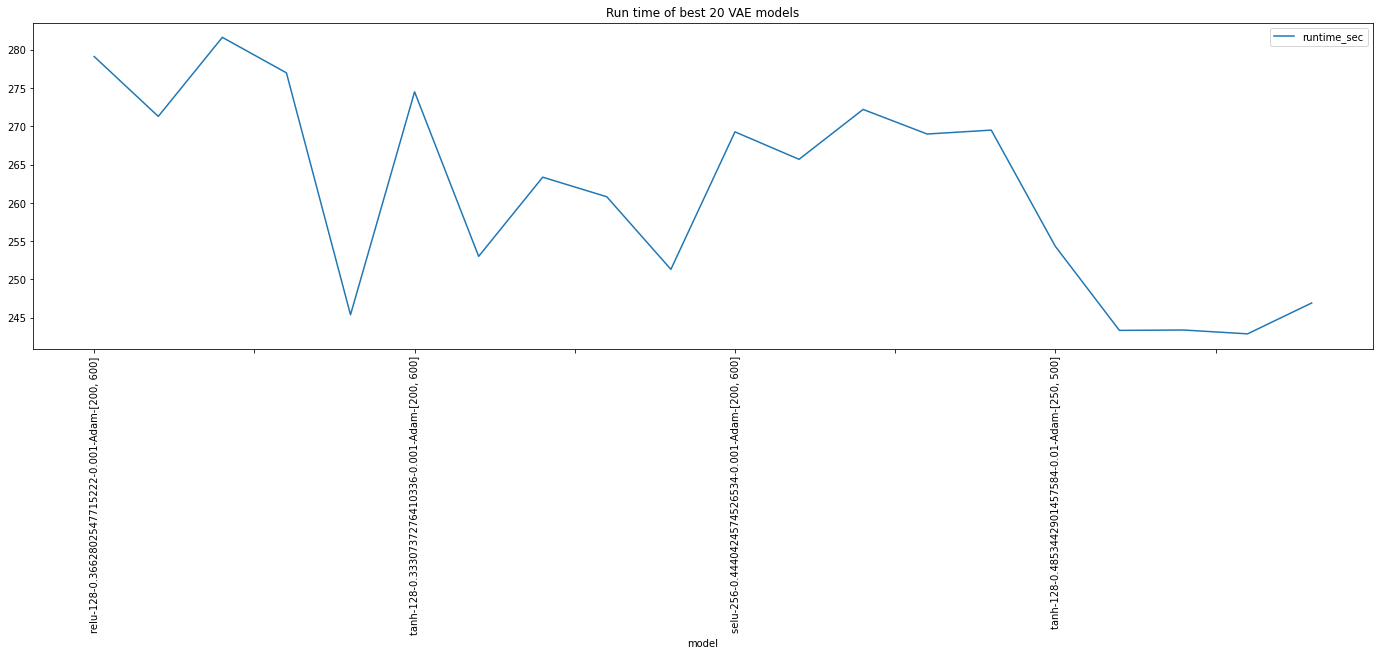

In [ ]:
VAE_tuning_results_ml_top.plot(x='model', y='runtime_sec',title ='Run time of best 20 VAE models',figsize=(24,6),rot=90)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


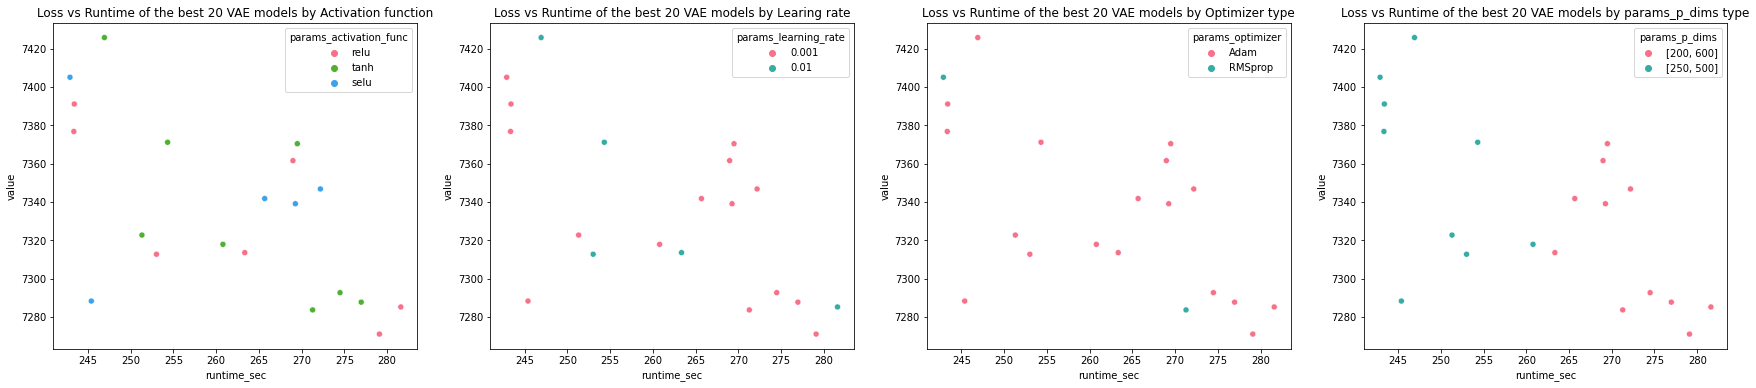

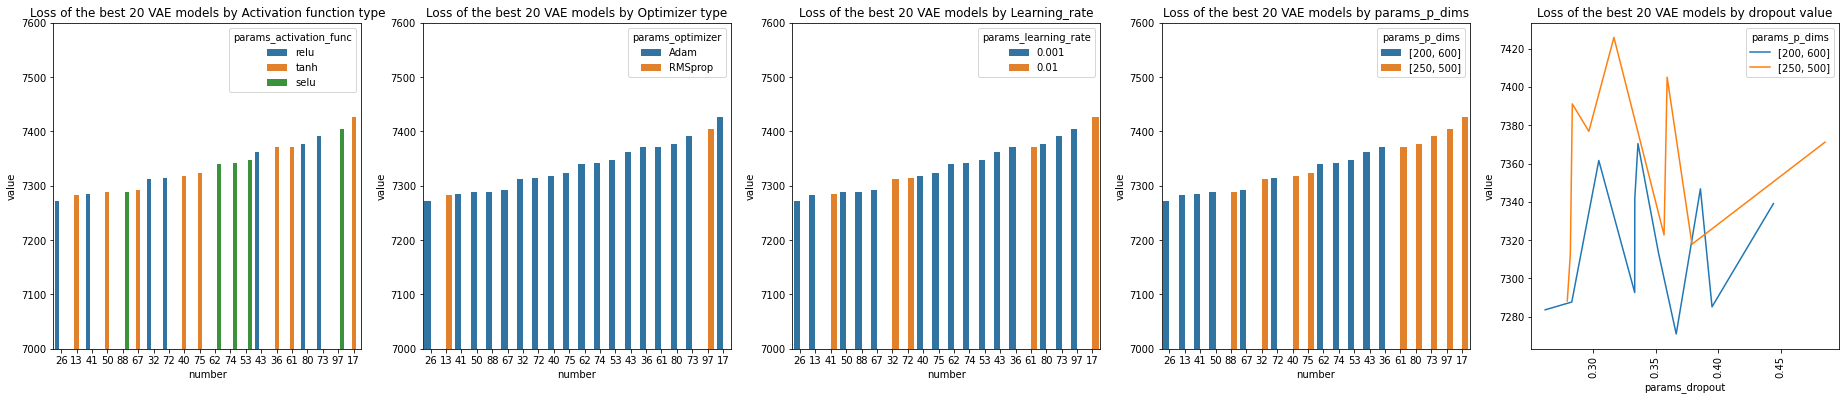

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

VAE_tuning_results_ml_top['number']=VAE_tuning_results_ml_top['number'].astype('str')
data=VAE_tuning_results_ml_top.sort_values(by=['value'],ascending=True)


fig, axs = plt.subplots(ncols=4,figsize=(30,6))

sns.scatterplot('runtime_sec', 'value', data=data, hue='params_activation_func',ax=axs[0],palette=sns.color_palette("husl", 3))
axs[0].set_title('Loss vs Runtime of the best 20 VAE models by Activation function')
sns.scatterplot('runtime_sec', 'value', data=data, hue='params_learning_rate',ax=axs[1],palette=sns.color_palette("husl", 2))
axs[1].set_title('Loss vs Runtime of the best 20 VAE models by Learing rate')
sns.scatterplot('runtime_sec', 'value', data=data, hue='params_optimizer',ax=axs[2],palette=sns.color_palette("husl", 2))
axs[2].set_title('Loss vs Runtime of the best 20 VAE models by Optimizer type')
sns.scatterplot('runtime_sec', 'value', data=data, hue='params_p_dims',ax=axs[3],palette=sns.color_palette("husl", 2))
axs[3].set_title('Loss vs Runtime of the best 20 VAE models by params_p_dims type')
plt.show()


fig, axs = plt.subplots(ncols=5,figsize=(32,6))
sns.barplot('number', 'value', data=data, hue='params_activation_func',ax=axs[0])
axs[0].set_title('Loss of the best 20 VAE models by Activation function type')
plt.xticks(rotation=90)
axs[0].set_ylim(7000,7600)

sns.barplot('number', 'value', data=data, hue='params_optimizer',ax=axs[1])
axs[1].set_title('Loss of the best 20 VAE models by Optimizer type')
axs[1].set_ylim(7000,7600)


sns.barplot('number', 'value', data=data, hue='params_learning_rate',ax=axs[2])
axs[2].set_title('Loss of the best 20 VAE models by Learning_rate')
axs[2].set_ylim(7000,7600)

sns.barplot('number', 'value', data=data, hue='params_p_dims',ax=axs[3])
axs[3].set_title('Loss of the best 20 VAE models by params_p_dims')
axs[3].set_ylim(7000,7600)

sns.lineplot('params_dropout', 'value', data=data, hue='params_p_dims',ax=axs[4])
axs[4].set_title('Loss of the best 20 VAE models by dropout value')
plt.show()

**Best VAE model for ML Data set with creterion min of Loss**

In [ ]:
VAE_tuning_results_ml_top.head(1)


,number,value,datetime_start,datetime_complete,duration,params_activation_func,params_batch_size,params_dropout,params_learning_rate,params_optimizer,params_p_dims,state,runtime_sec,model
26,26,7271.063681,2022-02-08 07:05:26.135290,2022-02-08 07:10:05.232849,0 days 00:04:39.097559,relu,128,0.36628,0.001,Adam,"[200, 600]",COMPLETE,279.097559,"relu-128-0.3662802547715222-0.001-Adam-[200, 600]"


**Tensorboard Charts Import for the best VAE model fit**




In [ ]:
from google.colab import files
uploaded = files.upload()

Saving mrr_validation_mrr_VAE .svg to mrr_validation_mrr_VAE .svg
Saving validation_rmse_loss_VAE.svg to validation_rmse_loss_VAE.svg
Saving validation_loss_VAE.svg to validation_loss_VAE.svg
Saving training_loss _VAE.svg to training_loss _VAE.svg


**Training Loss for the best VAE model**

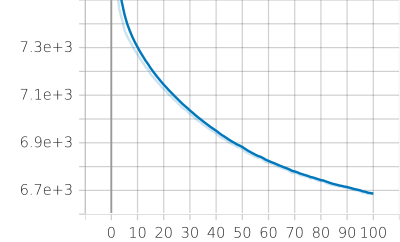

In [ ]:
from IPython.display import SVG
SVG('training_loss _VAE.svg')



**Validation Loss for the best VAE Model**



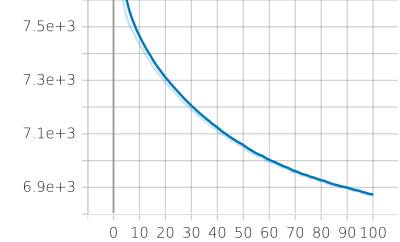

In [ ]:
SVG('validation_loss_VAE.svg')

**Validation  RMSE Loss for the best VAE Model**


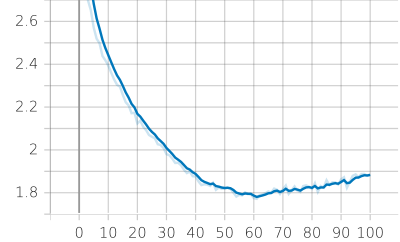

In [ ]:

SVG('validation_rmse_loss_VAE.svg')

**MRR for the best VAE Model**

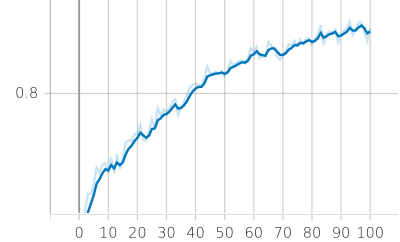

In [ ]:

SVG('mrr_validation_mrr_VAE .svg')


# **AE Models Fitting**

In [ ]:

AE_tuning_results_ml['runtime_sec'] =(pd.to_datetime(AE_tuning_results_ml['datetime_complete'] )- pd.to_datetime(AE_tuning_results_ml['datetime_start'])).dt.total_seconds() 
AE_tuning_results_ml

,number,value,datetime_start,datetime_complete,duration,params_batch_size,params_latent_dim,params_learning_rate,params_optimizer,state,runtime_sec
0,0,2.814223,2022-02-08 13:36:52.411901,2022-02-08 13:38:58.931913,0 days 00:02:06.520012,512,10,0.001,RMSprop,COMPLETE,126.520012
1,1,2.812656,2022-02-08 13:38:58.934371,2022-02-08 13:40:05.420198,0 days 00:01:06.485827,512,100,0.010,RMSprop,COMPLETE,66.485827
2,2,2.813026,2022-02-08 13:40:05.423456,2022-02-08 13:41:50.204903,0 days 00:01:44.781447,512,100,0.001,RMSprop,COMPLETE,104.781447
3,3,2.813824,2022-02-08 13:41:50.207518,2022-02-08 13:44:27.233141,0 days 00:02:37.025623,512,10,0.001,RMSprop,COMPLETE,157.025623
4,4,2.812777,2022-02-08 13:44:27.235623,2022-02-08 13:46:49.470175,0 days 00:02:22.234552,512,500,1.000,RMSprop,COMPLETE,142.234552
...,...,...,...,...,...,...,...,...,...,...,...
95,95,2.811761,2022-02-08 16:28:28.808099,2022-02-08 16:29:59.080699,0 days 00:01:30.272600,512,100,0.100,RMSprop,COMPLETE,90.272600
96,96,2.811425,2022-02-08 16:29:59.083233,2022-02-08 16:32:08.086435,0 days 00:02:09.003202,512,10,0.100,RMSprop,COMPLETE,129.003202
97,97,2.812531,2022-02-08 16:32:08.088803,2022-02-08 16:33:38.822394,0 days 00:01:30.733591,512,100,0.010,RMSprop,COMPLETE,90.733591
98,98,2.813528,2022-02-08 16:33:38.824857,2022-02-08 16:35:09.406264,0 days 00:01:30.581407,512,500,0.100,RMSprop,COMPLETE,90.581407


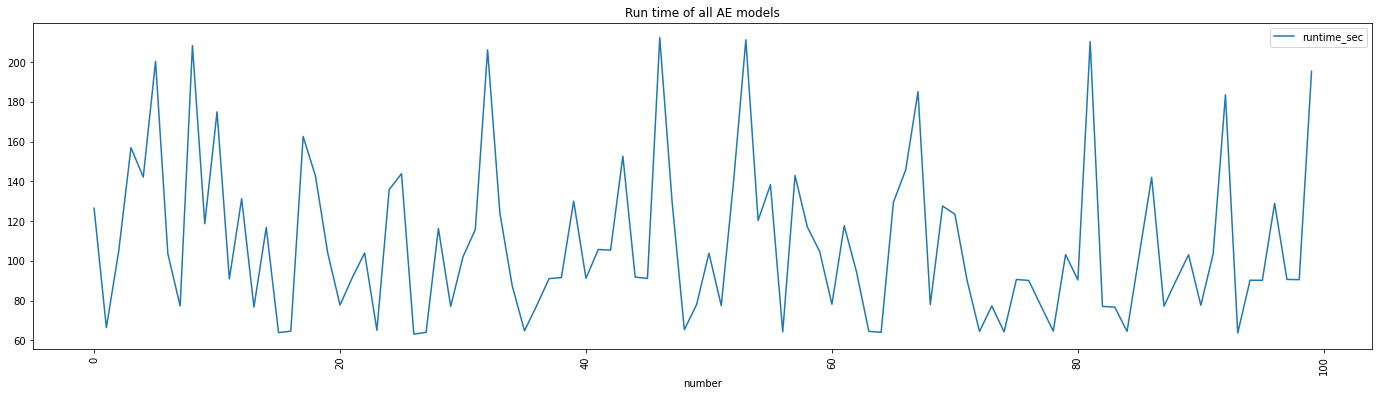

In [ ]:
AE_tuning_results_ml.plot(x='number', y='runtime_sec',title ='Run time of all AE models',figsize=(24,6),rot=90)


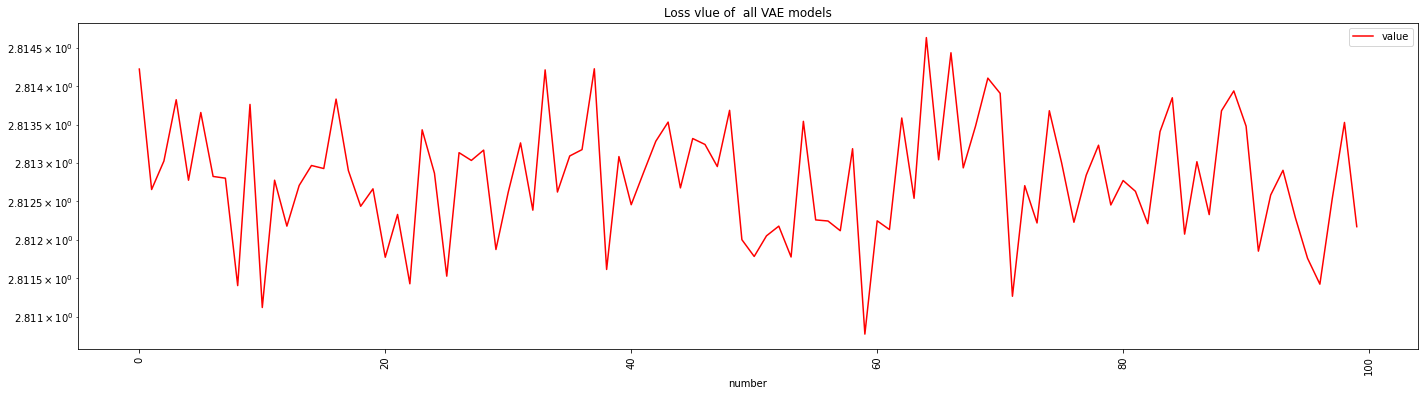

In [ ]:
AE_tuning_results_ml.plot(x='number', y='value',title ='Loss vlue of  all VAE models',figsize=(24,6),rot=90,color='r',logy=True)


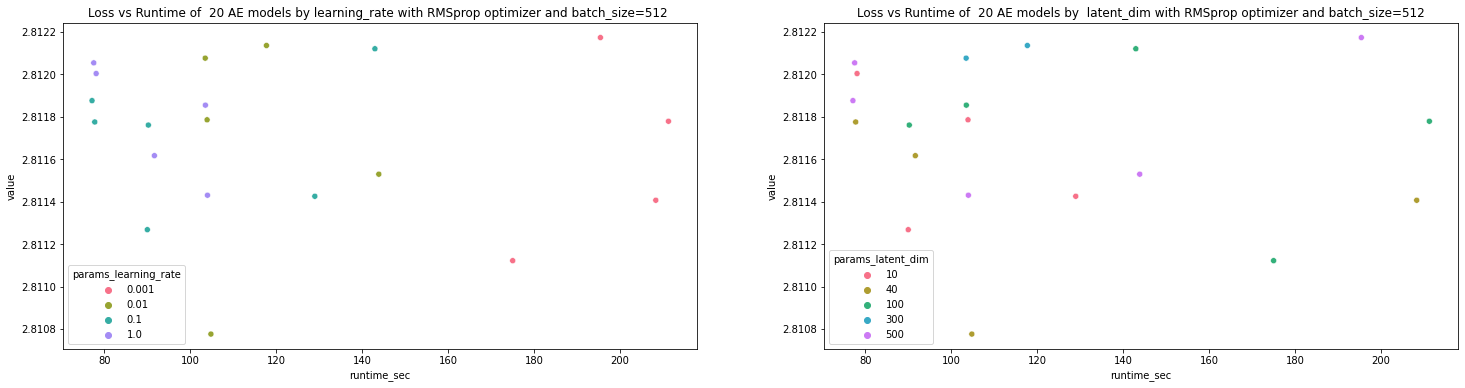

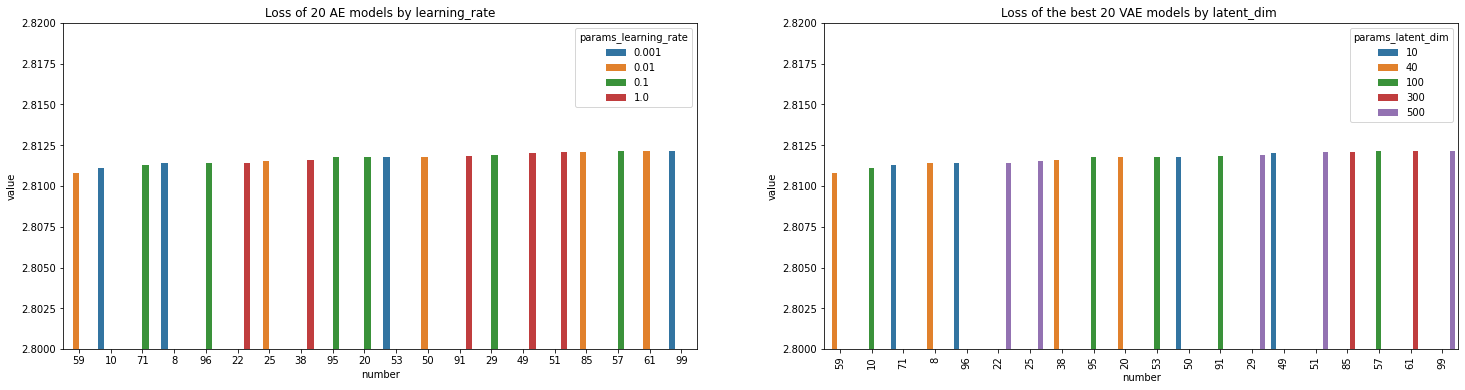

In [ ]:

AE_tuning_results_ml['number']=AE_tuning_results_ml['number'].astype('str')
data=AE_tuning_results_ml.sort_values(by=['value'],ascending=True).head(20)


fig, axs = plt.subplots(ncols=2,figsize=(25,6))

sns.scatterplot('runtime_sec', 'value', data=data, hue='params_learning_rate',ax=axs[0],palette=sns.color_palette("husl", 4))
axs[0].set_title('Loss vs Runtime of  20 AE models by learning_rate with RMSprop optimizer and batch_size=512 ')
sns.scatterplot('runtime_sec', 'value', data=data, hue='params_latent_dim',ax=axs[1],palette=sns.color_palette("husl", 5))
axs[1].set_title('Loss vs Runtime of  20 AE models by  latent_dim with RMSprop optimizer and batch_size=512')

plt.show()


fig, axs = plt.subplots(ncols=2,figsize=(25,6))
sns.barplot('number', 'value', data=data, hue='params_learning_rate',ax=axs[0])
axs[0].set_title('Loss of 20 AE models by learning_rate')
plt.xticks(rotation=90)
axs[0].set_ylim(2.8,2.82)

sns.barplot('number', 'value', data=data, hue='params_latent_dim',ax=axs[1])
axs[1].set_title('Loss of the best 20 VAE models by latent_dim ')
axs[1].set_ylim(2.8,2.82)

plt.show()

**Best AE model with creterion min of Loss**



In [ ]:
AE_tuning_results_ml.head(1)


,number,value,datetime_start,datetime_complete,duration,params_batch_size,params_latent_dim,params_learning_rate,params_optimizer,state,runtime_sec
0,0,2.814223,2022-02-08 13:36:52.411901,2022-02-08 13:38:58.931913,0 days 00:02:06.520012,512,10,0.001,RMSprop,COMPLETE,126.520012


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving mrr_validation_mrr AE.svg to mrr_validation_mrr AE.svg
Saving validation_loss AE.svg to validation_loss AE.svg
Saving training_loss AE.svg to training_loss AE.svg


**Training Loss for the best AE model**

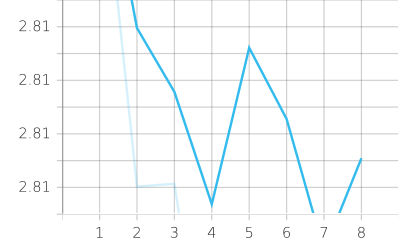

In [ ]:
from IPython.display import SVG
SVG('training_loss AE.svg')



**Validation Loss for the best AE Model**



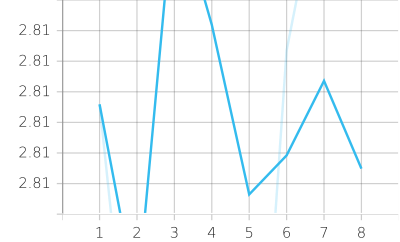

In [ ]:
SVG('validation_loss AE.svg')

**MRR for the best AE Model**

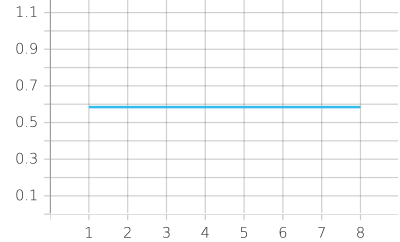

In [ ]:

SVG('mrr_validation_mrr AE.svg')


# **MF Models Fitting**

In [ ]:
MF_tuning_results_ml['runtime_sec'] =(pd.to_datetime(MF_tuning_results_ml['datetime_complete'] )- pd.to_datetime(MF_tuning_results_ml['datetime_start'])).dt.total_seconds() 
MF_tuning_results_ml=MF_tuning_results_ml.sort_values(by=['value'],ascending=True)
MF_tuning_results_ml.head(4)

,number,value,datetime_start,datetime_complete,duration,params_batch_size,params_latent_dim,params_learning_rate,params_optimizer,state,runtime_sec
18,18,1.032019,2022-02-08 07:32:10.900263,2022-02-08 07:36:01.787920,0 days 00:03:50.887657,128,10,1.0,SGD,COMPLETE,230.887657
5,5,1.083330,2022-02-08 06:41:32.411802,2022-02-08 06:45:23.973256,0 days 00:03:51.561454,128,10,1.0,SGD,COMPLETE,231.561454
4,4,2.476493,2022-02-08 06:37:40.378981,2022-02-08 06:41:32.410075,0 days 00:03:52.031094,128,100,1.0,SGD,COMPLETE,232.031094
14,14,3.618083,2022-02-08 07:16:36.165195,2022-02-08 07:20:30.795335,0 days 00:03:54.630140,128,10,0.1,SGD,COMPLETE,234.630140


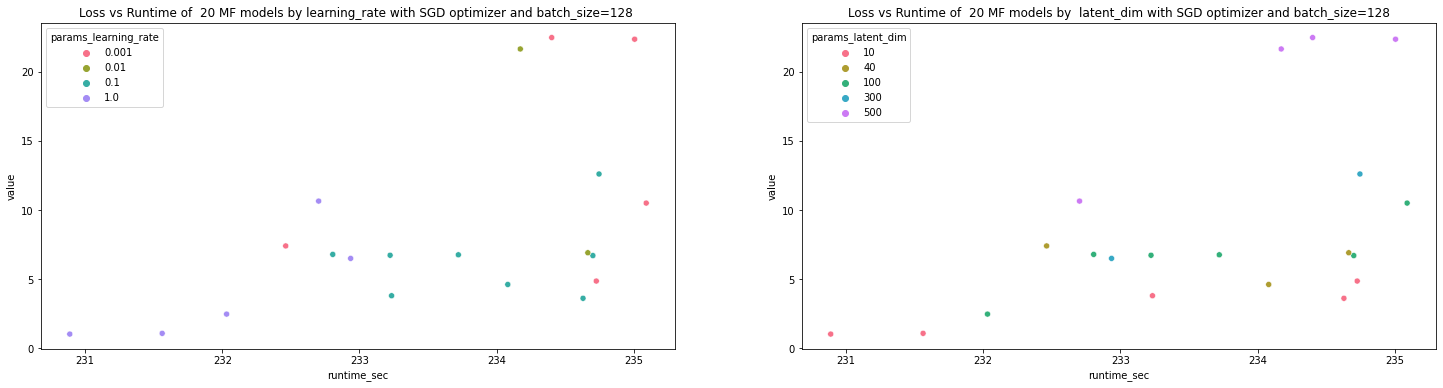

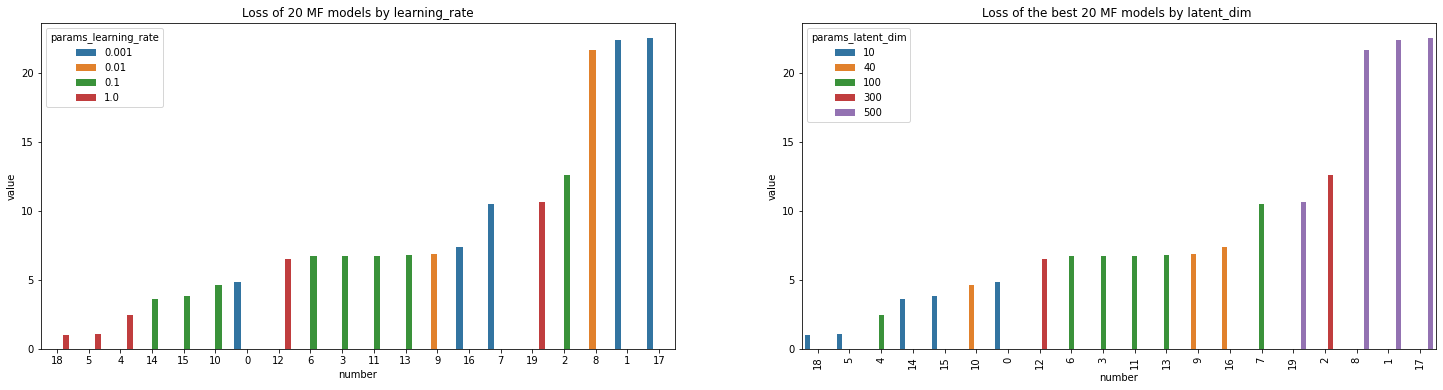

In [ ]:
MF_tuning_results_ml['number']=MF_tuning_results_ml['number'].astype('str')
data=MF_tuning_results_ml.sort_values(by=['value'],ascending=True).head(20)


fig, axs = plt.subplots(ncols=2,figsize=(25,6))

sns.scatterplot('runtime_sec', 'value', data=data, hue='params_learning_rate',ax=axs[0],palette=sns.color_palette("husl", 4))
axs[0].set_title('Loss vs Runtime of  20 MF models by learning_rate with SGD optimizer and batch_size=128 ')
sns.scatterplot('runtime_sec', 'value', data=data, hue='params_latent_dim',ax=axs[1],palette=sns.color_palette("husl", 5))
axs[1].set_title('Loss vs Runtime of  20 MF models by  latent_dim with SGD optimizer and batch_size=128')

plt.show()


fig, axs = plt.subplots(ncols=2,figsize=(25,6))
sns.barplot('number', 'value', data=data, hue='params_learning_rate',ax=axs[0])
axs[0].set_title('Loss of 20 MF models by learning_rate')
plt.xticks(rotation=90)
# axs[0].set_ylim(2.8,2.82)

sns.barplot('number', 'value', data=data, hue='params_latent_dim',ax=axs[1])
axs[1].set_title('Loss of the best 20 MF models by latent_dim ')
# axs[1].set_ylim(2.8,2.82)

plt.show()

**Best MF model with creterion min of Loss**


In [ ]:
MF_tuning_results_ml.sort_values(by=['value'],ascending=True).head(1)

,number,value,datetime_start,datetime_complete,duration,params_batch_size,params_latent_dim,params_learning_rate,params_optimizer,state,runtime_sec
18,18,1.032019,2022-02-08 07:32:10.900263,2022-02-08 07:36:01.787920,0 days 00:03:50.887657,128,10,1.0,SGD,COMPLETE,230.887657


**Tensorboard Charts Import for the best MF model fit**


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving training_loss_MF (1).svg to training_loss_MF (1) (1).svg
Saving validation_loss_MF (1).svg to validation_loss_MF (1) (1).svg
Saving mrr_validation_mrr_MF (1).svg to mrr_validation_mrr_MF (1) (1).svg


**Training Loss for the best MF model**

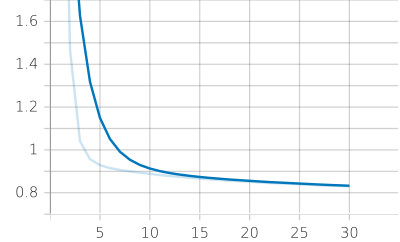

In [ ]:
SVG('training_loss_MF (1).svg')


**Validation Loss for the best VAE model**

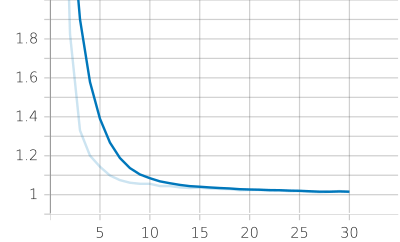

In [ ]:
SVG('validation_loss_MF (1).svg')


**MRR for the best MF Model**

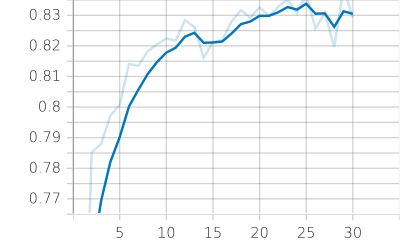

In [ ]:

SVG('mrr_validation_mrr_MF (1).svg')

In [ ]:
# Winning models parameters
#Comparison for 3 winning models

# **Books Data Set**


**Loading the data frames containing the results of the fitted models**

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd
  
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


link1 = 'https://drive.google.com/file/d/1A8YpI2BlhhCphDjzHL50suKgl-VP0U-T/view?usp=sharing'

link2='https://drive.google.com/file/d/19whZgfzLZqwd5idnn9NqISEG3fkdZKi2/view?usp=sharing'

link3='https://drive.google.com/file/d/12kxIRnX9gbUY2OLrlPPkELe8X64vcArh/view?usp=sharing'
  
# to get the id part of the file
id1 = link1.split("/")[-2]
id2 = link2.split("/")[-2]
id3 = link3.split("/")[-2]

downloaded1 = drive.CreateFile({'id':id1}) 
downloaded1.GetContentFile('df_tuning_results_bk_VAE.csv')  
downloaded2 = drive.CreateFile({'id':id2}) 
downloaded2.GetContentFile('df_tuning_results_bk_MF.csv')  
downloaded3 = drive.CreateFile({'id':id3}) 
downloaded3.GetContentFile('df_tuning_results_bk_AE.csv')  

VAE_tuning_results_bk = pd.read_csv( 'df_tuning_results_bk_VAE.csv')

MF_tuning_results_bk = pd.read_csv('df_tuning_results_bk_MF.csv' )

AE_tuning_results_bk = pd.read_csv( 'df_tuning_results_bk_AE.csv')

# MF_tuning_results_ml.head(4)
# AE_tuning_results_ml.head(4)
# VAE_tuning_results_ml.head(4)

# **VAE Models Fitting**

In [ ]:
#Loaded data frame data types verification
# VAE_tuning_results_ml.dtypes
#Adding model train runtime in sec to data frame
VAE_tuning_results_bk['runtime_sec'] = (pd.to_datetime(VAE_tuning_results_bk['datetime_complete'] )- pd.to_datetime(VAE_tuning_results_bk['datetime_start'])).dt.total_seconds() 
mask=(VAE_tuning_results_bk['state']=='COMPLETE')
VAE_tuning_results_bk = (VAE_tuning_results_bk[mask])
model=VAE_tuning_results_bk[['params_activation_func', 'params_batch_size', 'params_dropout','params_learning_rate','params_optimizer','params_p_dims']].astype(str)
model['model']=model[['params_activation_func', 'params_batch_size', 'params_dropout','params_learning_rate','params_optimizer','params_p_dims']].agg('-'.join, axis=1)
VAE_tuning_results_bk['model']=model['model']
VAE_tuning_results_bk


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,number,value,datetime_start,datetime_complete,duration,params_activation_func,params_batch_size,params_dropout,params_learning_rate,params_optimizer,params_p_dims,state,runtime_sec,model
0,0,599.447221,2022-02-09 12:05:31.707043,2022-02-09 12:20:27.946793,0 days 00:14:56.239750,tanh,512,0.397998,0.0001,Adam,"[250, 500]",COMPLETE,896.239750,"tanh-512-0.3979984363455492-0.0001-Adam-[250, ..."
1,1,775.969090,2022-02-09 12:20:27.949896,2022-02-09 12:28:05.851536,0 days 00:07:37.901640,tanh,256,0.498973,0.0100,RMSprop,"[200, 600]",COMPLETE,457.901640,"tanh-256-0.4989734815845899-0.01-RMSprop-[200,..."
2,2,632.390077,2022-02-09 12:28:05.854036,2022-02-09 12:41:06.001644,0 days 00:13:00.147608,tanh,256,0.352220,0.0001,SGD,"[200, 600]",COMPLETE,780.147608,"tanh-256-0.3522203316830904-0.0001-SGD-[200, 600]"
4,4,408.006725,2022-02-09 12:58:57.660623,2022-02-09 13:05:42.332240,0 days 00:06:44.671617,selu,128,0.473939,0.0010,RMSprop,"[250, 500]",COMPLETE,404.671617,selu-128-0.4739390807612695-0.001-RMSprop-[250...
5,5,622.208489,2022-02-09 13:05:42.334671,2022-02-09 13:22:00.492171,0 days 00:16:18.157500,selu,256,0.322222,0.0010,SGD,"[200, 600]",COMPLETE,978.157500,"selu-256-0.3222220474620194-0.001-SGD-[200, 600]"
6,6,846.026456,2022-02-09 13:22:00.494213,2022-02-09 13:29:20.095886,0 days 00:07:19.601673,tanh,256,0.334120,0.0100,RMSprop,"[200, 600]",COMPLETE,439.601673,"tanh-256-0.3341204252853355-0.01-RMSprop-[200,..."
7,7,582.538170,2022-02-09 13:29:20.098100,2022-02-09 13:39:23.683219,0 days 00:10:03.585119,relu,256,0.393774,0.0001,Adam,"[200, 600]",COMPLETE,603.585119,"relu-256-0.3937740913584329-0.0001-Adam-[200, ..."
9,9,633.467531,2022-02-09 13:56:12.148162,2022-02-09 14:14:51.441557,0 days 00:18:39.293395,selu,128,0.283530,0.0001,SGD,"[250, 500]",COMPLETE,1119.293395,"selu-128-0.2835295232043978-0.0001-SGD-[250, 500]"
11,11,383.862329,2022-02-09 14:32:49.298087,2022-02-09 14:39:07.430344,0 days 00:06:18.132257,selu,256,0.257183,0.0010,RMSprop,"[200, 600]",COMPLETE,378.132257,"selu-256-0.25718275121736-0.001-RMSprop-[200, ..."
12,12,630.150187,2022-02-09 14:39:07.432679,2022-02-09 14:56:17.311088,0 days 00:17:09.878409,tanh,256,0.379485,0.0010,SGD,"[250, 500]",COMPLETE,1029.878409,"tanh-256-0.379485163288781-0.001-SGD-[250, 500]"


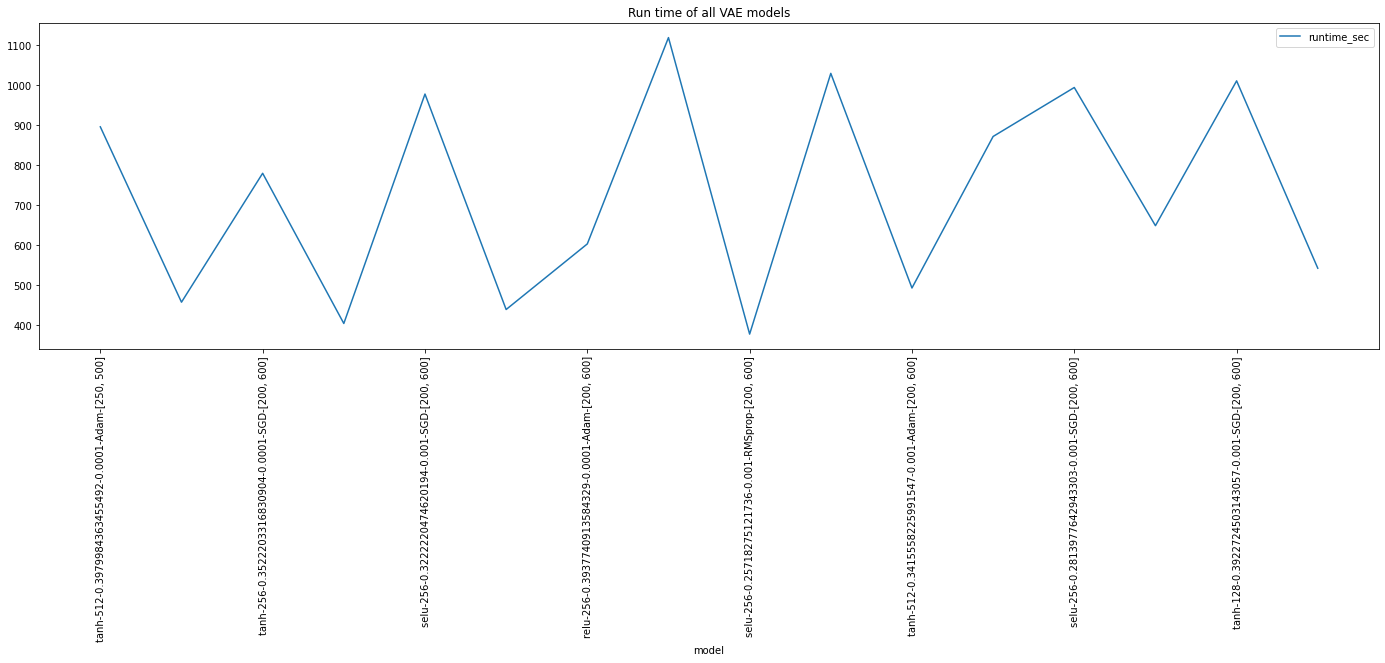

In [ ]:
VAE_tuning_results_bk.plot(x='model', y='runtime_sec',title ='Run time of all VAE models',figsize=(24,6),rot=90)

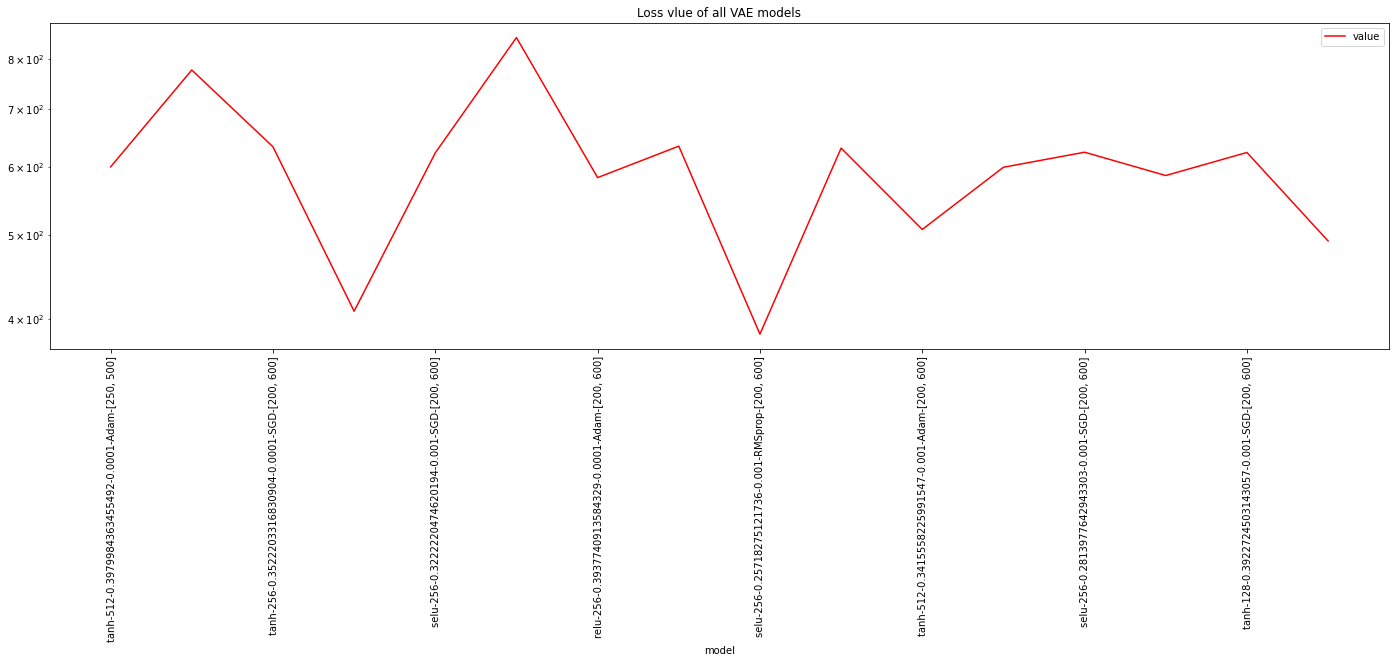

In [ ]:
VAE_tuning_results_bk.plot(x='model', y='value',title ='Loss vlue of all VAE models',figsize=(24,6),rot=90,color='r',logy=True)


In [ ]:
VAE_tuning_results_bk=VAE_tuning_results_bk.sort_values(by=['value'],ascending=True)
VAE_tuning_results_bk_top=VAE_tuning_results_bk.head(20)

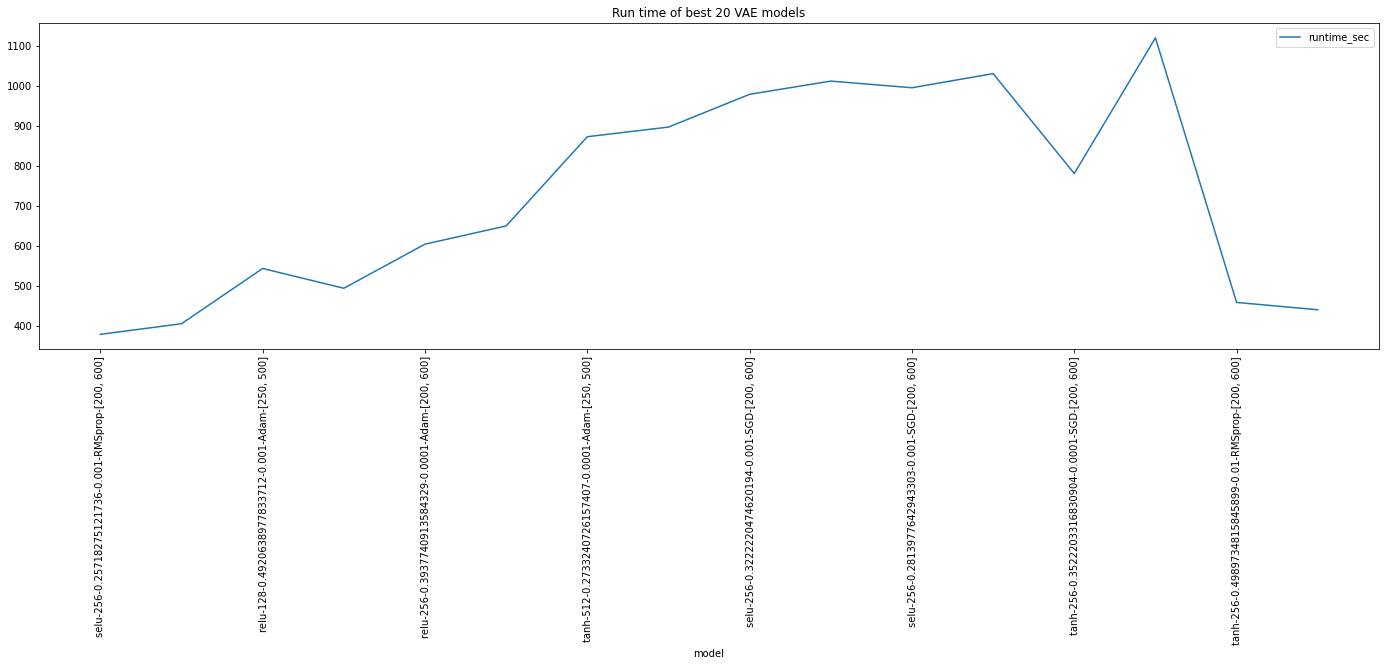

In [ ]:
VAE_tuning_results_bk_top.plot(x='model', y='runtime_sec',title ='Run time of best 20 VAE models',figsize=(24,6),rot=90)


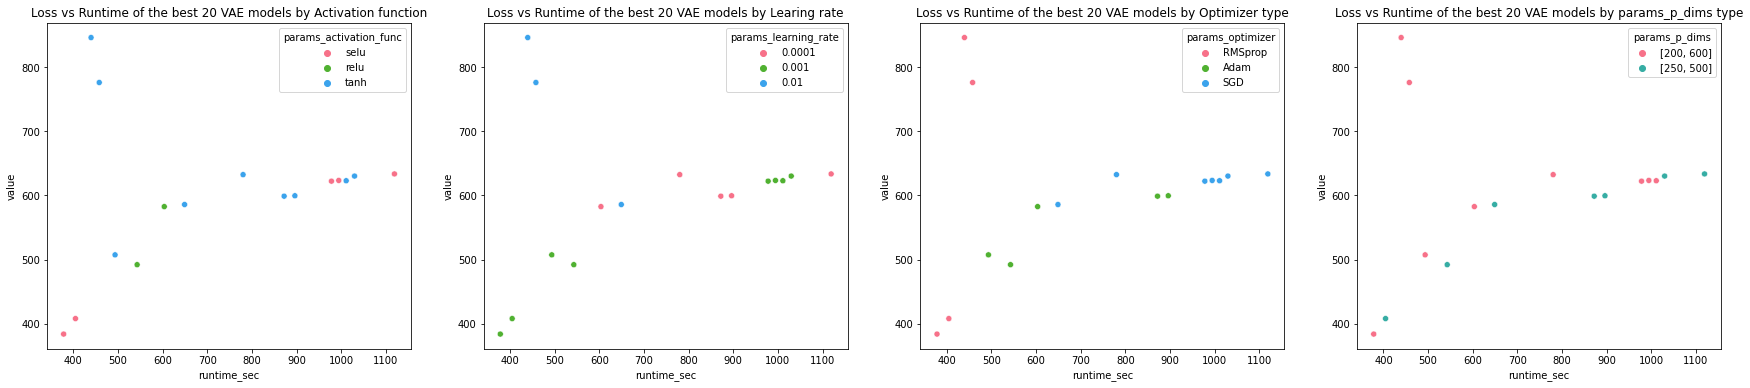

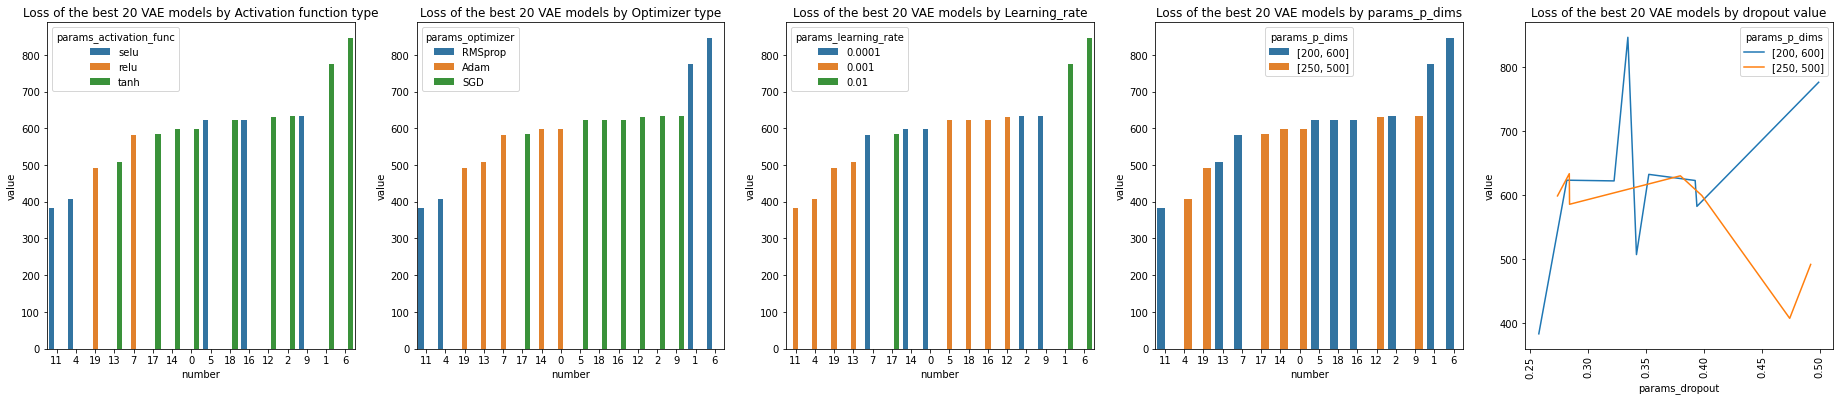

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

VAE_tuning_results_bk_top['number']=VAE_tuning_results_bk_top['number'].astype('str')
data=VAE_tuning_results_bk_top.sort_values(by=['value'],ascending=True)


fig, axs = plt.subplots(ncols=4,figsize=(30,6))

sns.scatterplot('runtime_sec', 'value', data=data, hue='params_activation_func',ax=axs[0],palette=sns.color_palette("husl", 3))
axs[0].set_title('Loss vs Runtime of the best 20 VAE models by Activation function')
sns.scatterplot('runtime_sec', 'value', data=data, hue='params_learning_rate',ax=axs[1],palette=sns.color_palette("husl", 3))
axs[1].set_title('Loss vs Runtime of the best 20 VAE models by Learing rate')
sns.scatterplot('runtime_sec', 'value', data=data, hue='params_optimizer',ax=axs[2],palette=sns.color_palette("husl", 3))
axs[2].set_title('Loss vs Runtime of the best 20 VAE models by Optimizer type')
sns.scatterplot('runtime_sec', 'value', data=data, hue='params_p_dims',ax=axs[3],palette=sns.color_palette("husl", 2))
axs[3].set_title('Loss vs Runtime of the best 20 VAE models by params_p_dims type')
plt.show()


fig, axs = plt.subplots(ncols=5,figsize=(32,6))
sns.barplot('number', 'value', data=data, hue='params_activation_func',ax=axs[0])
axs[0].set_title('Loss of the best 20 VAE models by Activation function type')
plt.xticks(rotation=90)
# axs[0].set_ylim(7000,7600)

sns.barplot('number', 'value', data=data, hue='params_optimizer',ax=axs[1])
axs[1].set_title('Loss of the best 20 VAE models by Optimizer type')
# axs[1].set_ylim(7000,7600)


sns.barplot('number', 'value', data=data, hue='params_learning_rate',ax=axs[2])
axs[2].set_title('Loss of the best 20 VAE models by Learning_rate')
# axs[2].set_ylim(7000,7600)

sns.barplot('number', 'value', data=data, hue='params_p_dims',ax=axs[3])
axs[3].set_title('Loss of the best 20 VAE models by params_p_dims')
# axs[3].set_ylim(7000,7600)

sns.lineplot('params_dropout', 'value', data=data, hue='params_p_dims',ax=axs[4])
axs[4].set_title('Loss of the best 20 VAE models by dropout value')
plt.show()

**Best VAE model for Books Data set with creterion min of Loss**

In [ ]:
VAE_tuning_results_bk_top.head(1)


,number,value,datetime_start,datetime_complete,duration,params_activation_func,params_batch_size,params_dropout,params_learning_rate,params_optimizer,params_p_dims,state,runtime_sec,model
11,11,383.862329,2022-02-09 14:32:49.298087,2022-02-09 14:39:07.430344,0 days 00:06:18.132257,selu,256,0.257183,0.001,RMSprop,"[200, 600]",COMPLETE,378.132257,"selu-256-0.25718275121736-0.001-RMSprop-[200, ..."


**Tensorboard Charts Import for the best VAE model fit**


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving mrr_validation_mrr_bk_VAE.svg to mrr_validation_mrr_bk_VAE.svg
Saving validation_loss _bk_VAE.svg to validation_loss _bk_VAE.svg
Saving validation_rmse_loss _bk_VAE.svg to validation_rmse_loss _bk_VAE.svg
Saving training_loss _bk_VAE.svg to training_loss _bk_VAE.svg


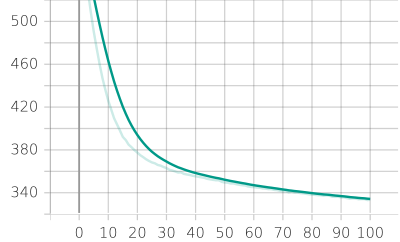

In [ ]:
SVG('training_loss _bk_VAE.svg')


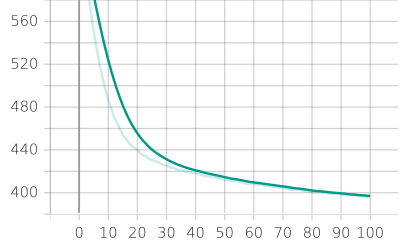

In [ ]:
SVG('validation_loss _bk_VAE.svg')

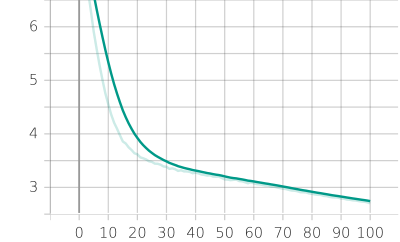

In [ ]:
SVG('validation_rmse_loss _bk_VAE.svg')

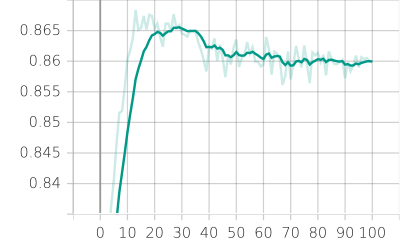

In [ ]:


SVG('mrr_validation_mrr_bk_VAE.svg')

# **AE Models Fitting**

In [ ]:

AE_tuning_results_bk['runtime_sec'] =(pd.to_datetime(AE_tuning_results_bk['datetime_complete'] )- pd.to_datetime(AE_tuning_results_bk['datetime_start'])).dt.total_seconds() 
AE_tuning_results_bk

,number,value,datetime_start,datetime_complete,duration,params_batch_size,params_latent_dim,params_learning_rate,params_optimizer,state,runtime_sec
0,0,7.053462,2022-02-09 10:50:17.514549,2022-02-09 10:59:53.377186,0 days 00:09:35.862637,512,100,1.000,RMSprop,COMPLETE,575.862637
1,1,7.057998,2022-02-09 10:59:53.380868,2022-02-09 11:15:17.806690,0 days 00:15:24.425822,512,500,0.100,RMSprop,COMPLETE,924.425822
2,2,7.056832,2022-02-09 11:15:17.812085,2022-02-09 11:24:43.650704,0 days 00:09:25.838619,512,500,1.000,RMSprop,COMPLETE,565.838619
3,3,7.056409,2022-02-09 11:24:43.653867,2022-02-09 11:32:37.862691,0 days 00:07:54.208824,512,300,1.000,RMSprop,COMPLETE,474.208824
4,4,7.055799,2022-02-09 11:32:37.865477,2022-02-09 11:40:31.326662,0 days 00:07:53.461185,512,40,1.000,RMSprop,COMPLETE,473.461185
5,5,7.056953,2022-02-09 11:40:31.329179,2022-02-09 11:46:53.356797,0 days 00:06:22.027618,512,300,0.010,RMSprop,COMPLETE,382.027618
6,6,7.055825,2022-02-09 11:46:53.359026,2022-02-09 11:53:17.361838,0 days 00:06:24.002812,512,500,0.001,RMSprop,COMPLETE,384.002812
7,7,7.057684,2022-02-09 11:53:17.364759,2022-02-09 11:59:41.705871,0 days 00:06:24.341112,512,500,1.000,RMSprop,COMPLETE,384.341112
8,8,7.055950,2022-02-09 11:59:41.708687,2022-02-09 12:06:00.862276,0 days 00:06:19.153589,512,300,1.000,RMSprop,COMPLETE,379.153589
9,9,7.056096,2022-02-09 12:06:00.864357,2022-02-09 12:18:11.736489,0 days 00:12:10.872132,512,500,0.100,RMSprop,COMPLETE,730.872132


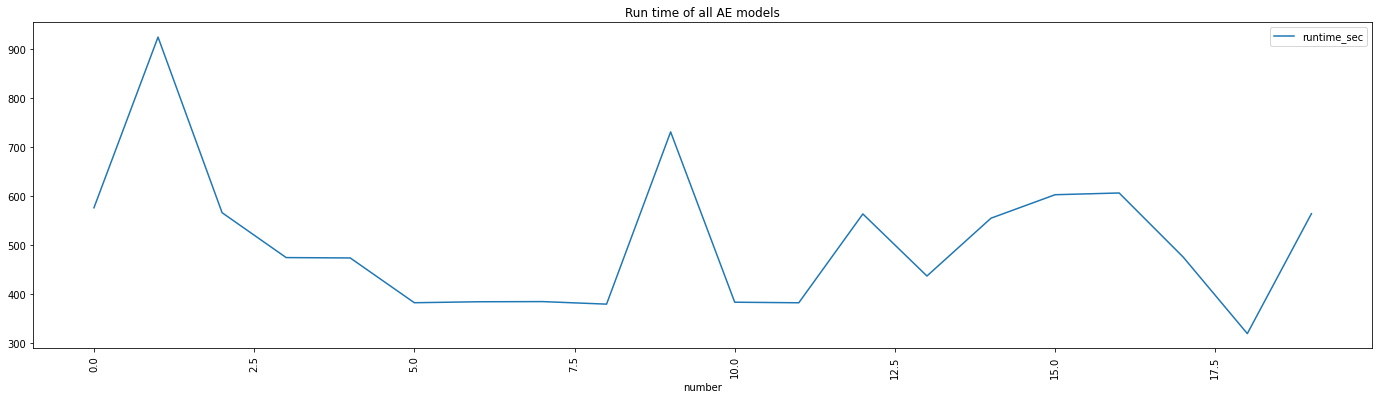

In [ ]:
AE_tuning_results_bk.plot(x='number', y='runtime_sec',title ='Run time of all AE models',figsize=(24,6),rot=90)


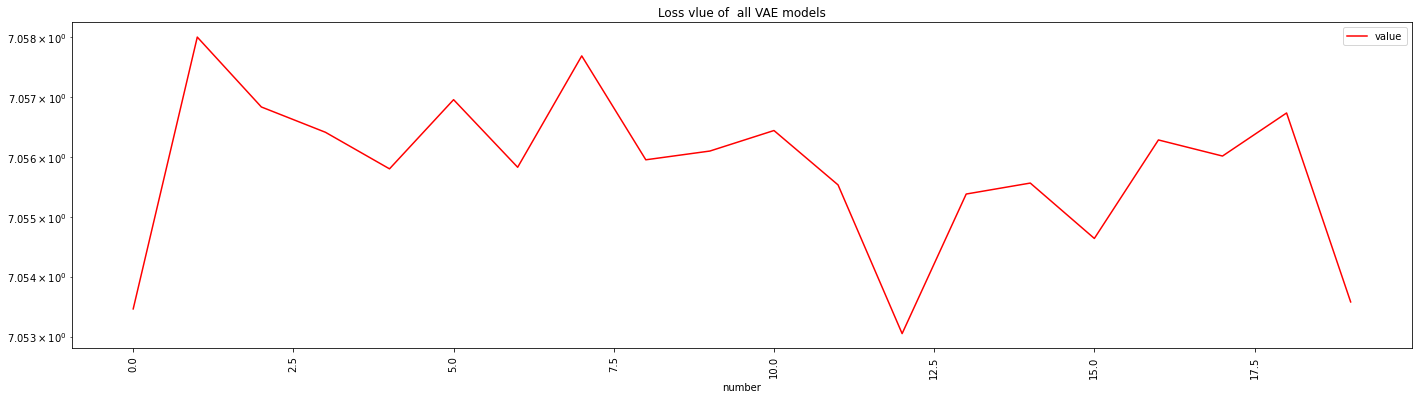

In [ ]:
AE_tuning_results_bk.plot(x='number', y='value',title ='Loss vlue of  all VAE models',figsize=(24,6),rot=90,color='r',logy=True)

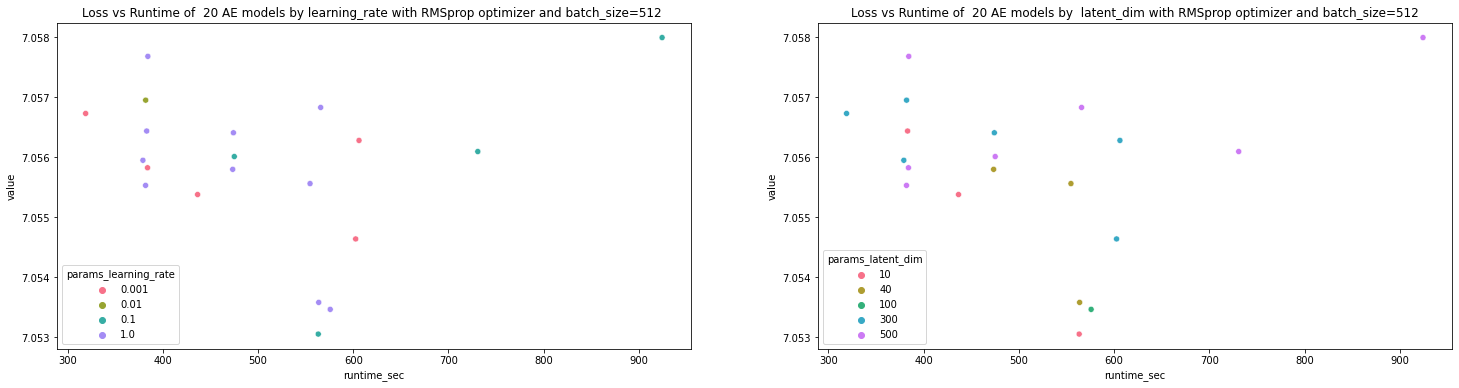

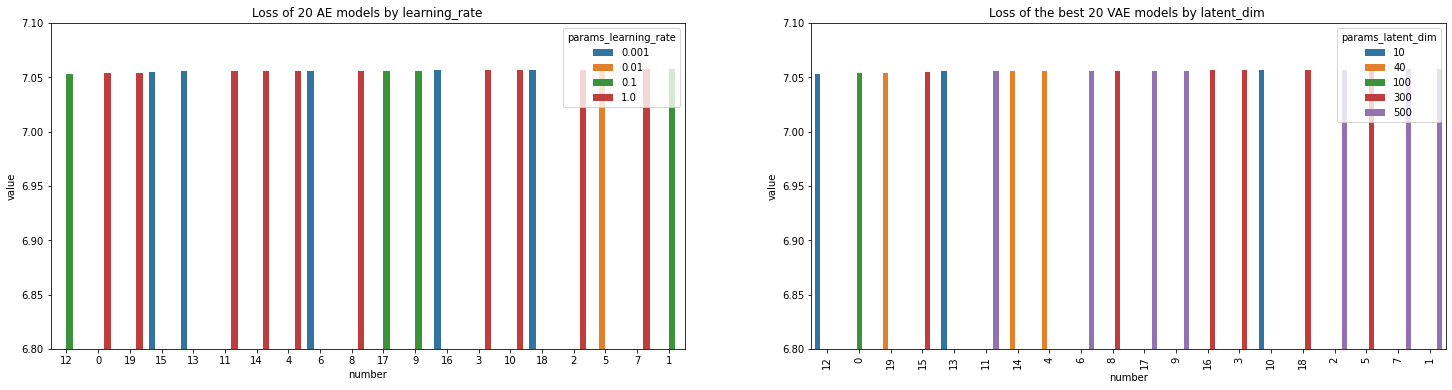

In [ ]:

AE_tuning_results_bk['number']=AE_tuning_results_bk['number'].astype('str')
data=AE_tuning_results_bk.sort_values(by=['value'],ascending=True).head(20)


fig, axs = plt.subplots(ncols=2,figsize=(25,6))

sns.scatterplot('runtime_sec', 'value', data=data, hue='params_learning_rate',ax=axs[0],palette=sns.color_palette("husl", 4))
axs[0].set_title('Loss vs Runtime of  20 AE models by learning_rate with RMSprop optimizer and batch_size=512 ')
sns.scatterplot('runtime_sec', 'value', data=data, hue='params_latent_dim',ax=axs[1],palette=sns.color_palette("husl", 5))
axs[1].set_title('Loss vs Runtime of  20 AE models by  latent_dim with RMSprop optimizer and batch_size=512')

plt.show()


fig, axs = plt.subplots(ncols=2,figsize=(25,6))
sns.barplot('number', 'value', data=data, hue='params_learning_rate',ax=axs[0])
axs[0].set_title('Loss of 20 AE models by learning_rate')
plt.xticks(rotation=90)
axs[0].set_ylim(6.8,7.1)

sns.barplot('number', 'value', data=data, hue='params_latent_dim',ax=axs[1])
axs[1].set_title('Loss of the best 20 VAE models by latent_dim ')
axs[1].set_ylim(6.8,7.1)

plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving mrr_validation_mrr _ae.svg to mrr_validation_mrr _ae.svg
Saving validation_loss_ae.svg to validation_loss_ae.svg
Saving training_loss _ae.svg to training_loss _ae.svg


**Training Loss for the best AE model**

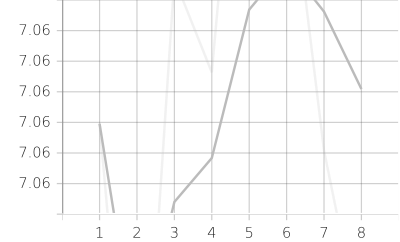

In [ ]:
from IPython.display import SVG
SVG('training_loss _ae.svg')



**Validation Loss for the best AE Model**



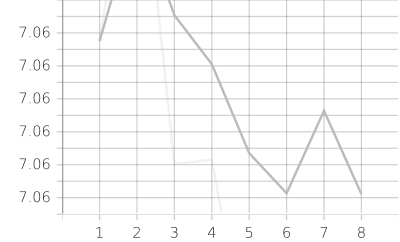

In [ ]:
SVG('validation_loss_ae.svg')

**MRR for the best AE Model**

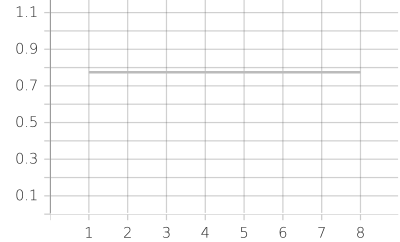

In [ ]:

SVG('mrr_validation_mrr _ae.svg')


# **MF Models Fitting**

In [ ]:
MF_tuning_results_bk['runtime_sec'] =(pd.to_datetime(MF_tuning_results_bk['datetime_complete'] )- pd.to_datetime(MF_tuning_results_bk['datetime_start'])).dt.total_seconds() 
MF_tuning_results_bk=MF_tuning_results_bk.sort_values(by=['value'],ascending=True)
MF_tuning_results_bk.head(4)

,number,value,datetime_start,datetime_complete,duration,params_batch_size,params_latent_dim,params_learning_rate,params_optimizer,state,runtime_sec
12,12,8.552793,2022-02-09 11:22:40.327328,2022-02-09 11:25:58.235599,0 days 00:03:17.908271,512,10,0.10,SGD,COMPLETE,197.908271
4,4,8.630198,2022-02-09 10:56:21.453960,2022-02-09 10:59:45.719445,0 days 00:03:24.265485,512,10,0.01,SGD,COMPLETE,204.265485
5,5,8.667910,2022-02-09 10:59:45.721230,2022-02-09 11:03:02.129116,0 days 00:03:16.407886,512,10,0.01,SGD,COMPLETE,196.407886
14,14,9.865021,2022-02-09 11:29:28.989560,2022-02-09 11:32:43.151558,0 days 00:03:14.161998,512,40,1.00,SGD,COMPLETE,194.161998


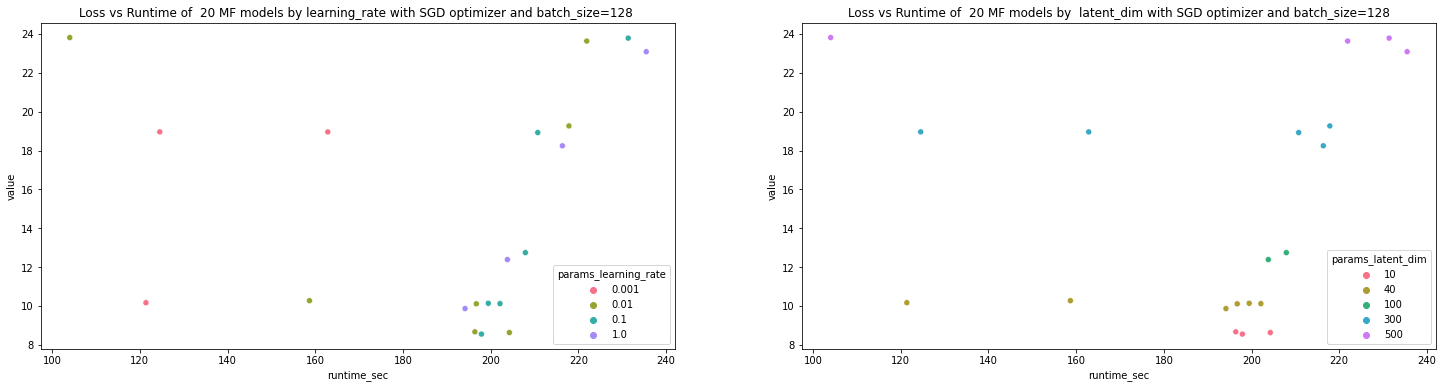

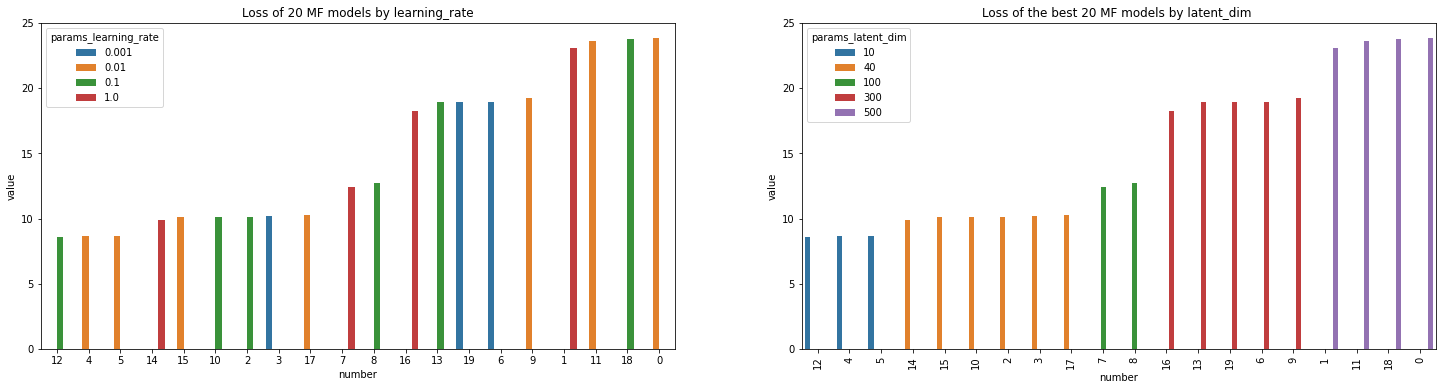

In [ ]:
MF_tuning_results_bk['number']=MF_tuning_results_bk['number'].astype('str')
data=MF_tuning_results_bk.sort_values(by=['value'],ascending=True).head(20)


fig, axs = plt.subplots(ncols=2,figsize=(25,6))

sns.scatterplot('runtime_sec', 'value', data=data, hue='params_learning_rate',ax=axs[0],palette=sns.color_palette("husl", 4))
axs[0].set_title('Loss vs Runtime of  20 MF models by learning_rate with SGD optimizer and batch_size=128 ')
sns.scatterplot('runtime_sec', 'value', data=data, hue='params_latent_dim',ax=axs[1],palette=sns.color_palette("husl", 5))
axs[1].set_title('Loss vs Runtime of  20 MF models by  latent_dim with SGD optimizer and batch_size=128')

plt.show()


fig, axs = plt.subplots(ncols=2,figsize=(25,6))
sns.barplot('number', 'value', data=data, hue='params_learning_rate',ax=axs[0])
axs[0].set_title('Loss of 20 MF models by learning_rate')
plt.xticks(rotation=90)
# axs[0].set_ylim(2.8,2.82)

sns.barplot('number', 'value', data=data, hue='params_latent_dim',ax=axs[1])
axs[1].set_title('Loss of the best 20 MF models by latent_dim ')
# axs[1].set_ylim(2.8,2.82)

plt.show()

**Tensorboard Charts Import for the best MF model fit**


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving training_loss (1) (1).svg to training_loss (1) (1).svg
Saving validation_loss (1) (1).svg to validation_loss (1) (1).svg
Saving mrr_validation_mrr (1) (1).svg to mrr_validation_mrr (1) (1).svg


**Training Loss for the best MF model**

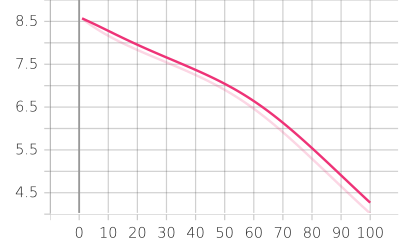

In [ ]:
SVG('training_loss (1) (1).svg')


**Validation Loss for the best VAE model**

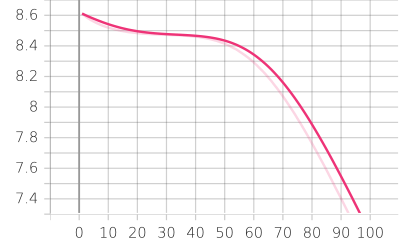

In [ ]:
SVG('validation_loss (1) (1).svg')


**MRR for the best MF Model**

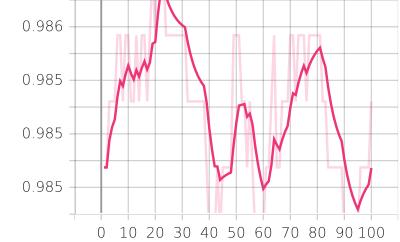

In [ ]:

SVG('mrr_validation_mrr (1) (1).svg')

# **MRR comparison for the best coosen model of each type**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving mrr_validation_mrr (2) (1).svg to mrr_validation_mrr (2) (1).svg


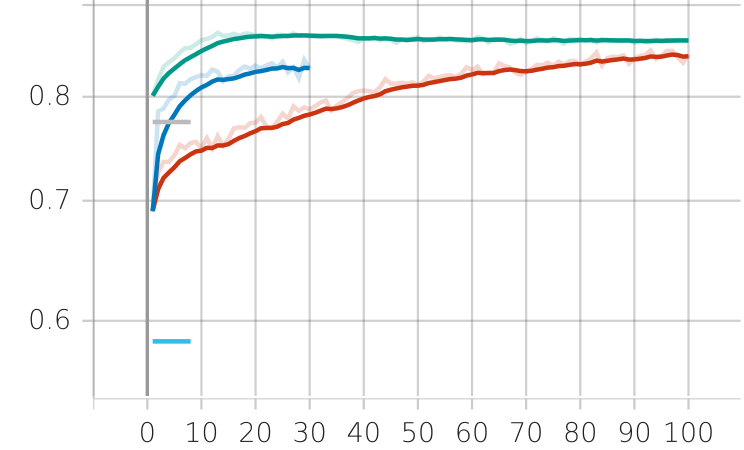

In [ ]:
SVG('mrr_validation_mrr (2) (1).svg')


# **Best models of each type for ML and Books Data Sets**
**MF:**

**ML Data Set:**

Final test loss = 1.0123694311603322
Final test MRR = 0.829210711768851

**Books Data Set:**

Final test loss = 7.019218284318023
Final test MRR = 0.9853606382103792

**AE:**

**ML Data Set:**

Final test loss = 2.811177450839854
Final test MRR = 0.5843510762856894

**Books Data Set:**

Final test loss = 7.055295742027436
Final test MRR = 0.7792153713452846

**VAE:**

**ML Data Set:**

Final test loss = 6869.694009713978
Final test MRR = 0.8465324687021532

**Books Data Set:**

Final test loss = 396.0150543381436
Final test MRR = 0.8578363982622135


